In [248]:
# Retail Data Wrangling and Analytics
!pip3 install psycopg2-binary



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [251]:
# Connecting to a Database to import data
import psycopg2

conn = psycopg2.connect(
    dbname="postgres",
    user="postgres",
    password="rocky1234",
    host="jrvs-psql",
    port="5432"  # default PostgreSQL port
)


In [271]:
# Load CSV into Dataframe from Database
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode


query = "SELECT * FROM retail;" 
retail_df = pd.read_sql(query, conn)
filtered_retail_df = pd.DataFrame(retail_df[(retail_df["quantity"] >= 0) & (retail_df["unit_price"] >= 0)])
df=pd.DataFrame(filtered_retail_df)

pd.options.display.max_columns = 25




In [254]:

print(df.head())


  invoice_no stock_code                          description  quantity        invoice_date  unit_price  customer_id         country
0     489434      85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12 2009-12-01 07:45:00        6.95      13085.0  United Kingdom
1     489434     79323P                   PINK CHERRY LIGHTS        12 2009-12-01 07:45:00        6.75      13085.0  United Kingdom
2     489434     79323W                  WHITE CHERRY LIGHTS        12 2009-12-01 07:45:00        6.75      13085.0  United Kingdom
3     489434      22041         RECORD FRAME 7" SINGLE SIZE         48 2009-12-01 07:45:00        2.10      13085.0  United Kingdom
4     489434      21232       STRAWBERRY CERAMIC TRINKET BOX        24 2009-12-01 07:45:00        1.25      13085.0  United Kingdom


In [255]:
print(df.sample(10))



        invoice_no stock_code                         description  quantity        invoice_date  unit_price  customer_id         country
593220      541845      48194                      DOORMAT HEARTS         2 2011-01-23 12:41:00        7.95      15167.0  United Kingdom
62526       494918      20619            TROPICAL PASSPORT COVER          4 2010-01-19 17:49:00        1.66          NaN  United Kingdom
438806      531350     47021G  SET/6 BEAD COASTERS GAUZE BAG GOLD         4 2010-11-07 13:31:00        1.25      12748.0  United Kingdom
1065448     581453      22345      PARTY PIZZA DISH BLUE POLKADOT        24 2011-12-08 18:15:00        0.19      16401.0  United Kingdom
508610      536865     84559a            3D SHEET OF DOG STICKERS         1 2010-12-03 11:28:00        1.69          NaN  United Kingdom
232418      511867      21936            RED RETROSPOT PICNIC BAG         5 2010-06-11 10:30:00        2.95      15254.0  United Kingdom
572058      540355      21484         CHI

In [256]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044416 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   invoice_no    1044416 non-null  object        
 1   stock_code    1044416 non-null  object        
 2   description   1042723 non-null  object        
 3   quantity      1044416 non-null  int64         
 4   invoice_date  1044416 non-null  datetime64[ns]
 5   unit_price    1044416 non-null  float64       
 6   customer_id   805620 non-null   float64       
 7   country       1044416 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 71.7+ MB
None


In [257]:
print(df.describe())


           quantity    unit_price    customer_id
count  1.044416e+06  1.044416e+06  805620.000000
mean   1.117616e+01  4.066322e+00   15331.856250
std    1.294564e+02  5.138175e+01    1696.768395
min    1.000000e+00  0.000000e+00   12346.000000
25%    1.000000e+00  1.250000e+00   13982.000000
50%    3.000000e+00  2.100000e+00   15271.000000
75%    1.000000e+01  4.130000e+00   16805.000000
max    8.099500e+04  2.511110e+04   18287.000000


Minimum Amount: 0.19
Maximum Amount: 168469.6
Median Amount: 304.32
Mean Amount: 523.3
Mode Amount: 15.0
[523.303760866311, 304.3150000000001, 15.0, 168469.6, 0.19]


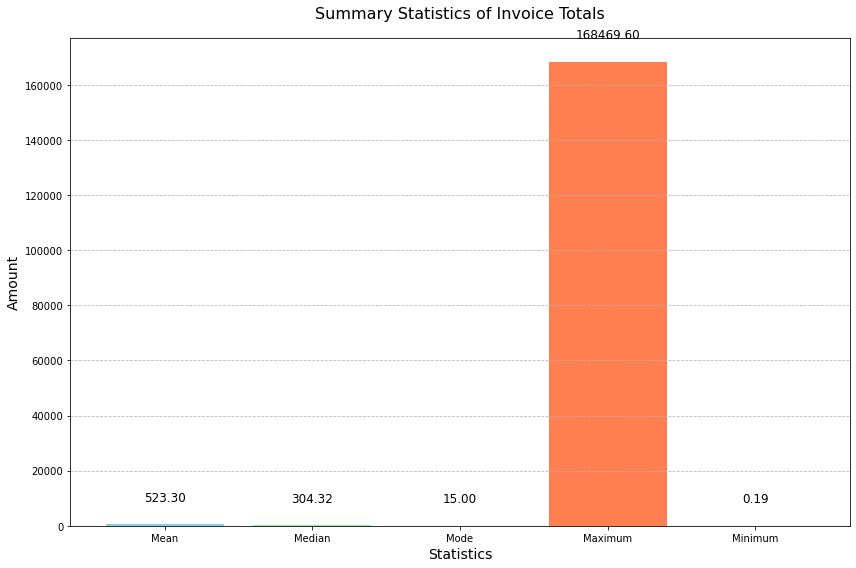

In [288]:
# Total Invoice Amount Distribution

df['Invoice_amount'] = df['quantity'] * df['unit_price']
filtered_df = df[df['Invoice_amount'] > 0]
invoice_totals = filtered_df.groupby('invoice_no')['Invoice_amount'].sum()
invoice_totals = invoice_totals.rename('InvoiceSum')


min_amount = invoice_totals.min()

max_amount = invoice_totals.max()
median_amount = invoice_totals.median()
mean_amount = invoice_totals.mean()
mode_amount = invoice_totals.mode()[0]
print('Minimum Amount:', min_amount)
print('Maximum Amount:', max_amount)
print('Median Amount:', np.round(median_amount,2))
print('Mean Amount:', np.round(mean_amount,2))
print('Mode Amount:', mode_amount)


df['month'] = df['invoice_date'].dt.to_period('M')

statistics = {
    'Mean': mean_amount,
    'Median': median_amount,
   'Mode': mode_amount,
    'Maximum': max_amount,
    'Minimum': min_amount
}

labels = list(statistics.keys())
values = list(statistics.values())

print(values)

plt.figure(figsize=(12, 8))
plt.bar(labels, values, color=['skyblue', 'lightgreen', 'orange', 'coral', 'violet'])

plt.title('Summary Statistics of Invoice Totals', fontsize=16, pad=20)
plt.ylabel('Amount', fontsize=14)
plt.xlabel('Statistics', fontsize=14)

for i, value in enumerate(values):
    plt.text(i, value + 0.05 * max(values), f'{value:.2f}', ha='center', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.9)

plt.tight_layout()
plt.show()

In [259]:
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 96.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.3.1
    Uninstalling pip-24.3.1:
      Successfully uninstalled pip-24.3.1


Minimum Amount: 0.19
Maximum Amount: 724.25
Median Amount: 256.24
Mean Amount: 271.68
Mode Amount: 15.0


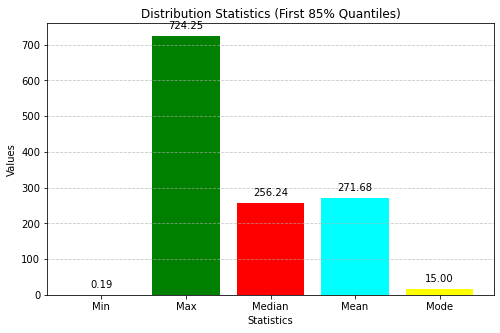

In [260]:
# Draw the distribution for the first 85 quantiles of the invoice amount data with min, max, median, mod, and mean


filtered_invoice_totals = invoice_totals[invoice_totals < invoice_totals.quantile(0.85)]

min_amount_85 = filtered_invoice_totals.min()
max_amount_85 = filtered_invoice_totals.max()
median_amount_85 = filtered_invoice_totals.median()
mean_amount_85 = filtered_invoice_totals.mean()
mode_85_series = filtered_invoice_totals.mode()
mode_amount_85 = mode_85_series[0] if not mode_85_series.empty else None


print('Minimum Amount:', min_amount_85)
print('Maximum Amount:', np.round(max_amount_85, 2))
print('Median Amount:', np.round(median_amount_85, 2))
print('Mean Amount:', np.round(mean_amount_85, 2))
print('Mode Amount:', mode_amount_85)

statistics = ['Min', 'Max', 'Median', 'Mean', 'Mode']
values = [min_amount_85, max_amount_85, median_amount_85, mean_amount_85, mode_amount_85]

plt.figure(figsize=(8, 5))
plt.bar(statistics, values, color=['blue', 'green', 'red', 'cyan', 'yellow'])

plt.xlabel('Statistics')
plt.ylabel('Values')
plt.title('Distribution Statistics (First 85% Quantiles)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, value in enumerate(values):
    if value is not None:  # Check to avoid errors with None
        plt.text(i, value + (abs(max(values)) * 0.02), f'{value:.2f}', ha='center', va='bottom')

plt.show()



In [261]:
# Monthly placed and cancelled order

placed_df = pd.DataFrame(retail_df)
placed_df["invoice_date"] = pd.to_datetime(placed_df["invoice_date"])

placed_df["invoice_month"] = df["invoice_date"].dt.to_period("M").astype(str).str.replace("-", "")

placed_df = placed_df.groupby("invoice_month").size().reset_index(name="count")

cancelled_df = retail_df[retail_df["invoice_no"].str.startswith("C")].copy()
cancelled_df["invoice_month"] = cancelled_df["invoice_date"].dt.to_period("M").astype(str).str.replace("-", "")
cancelled_df = cancelled_df.groupby("invoice_month").size().reset_index(name="cancelled_count")

merged_df = pd.merge(placed_df, cancelled_df, on="invoice_month", how="outer")

merged_df.fillna(0, inplace=True)

print(merged_df.head())




  invoice_month  count  cancelled_count
0        200912  44123             1015
1        201001  30741              686
2        201002  28365              576
3        201003  40477              844
4        201004  33355              626


  invoice_month  count  cancelled_count
0        200912  44123             1015
1        201001  30741              686
2        201002  28365              576
3        201003  40477              844
4        201004  33355              626


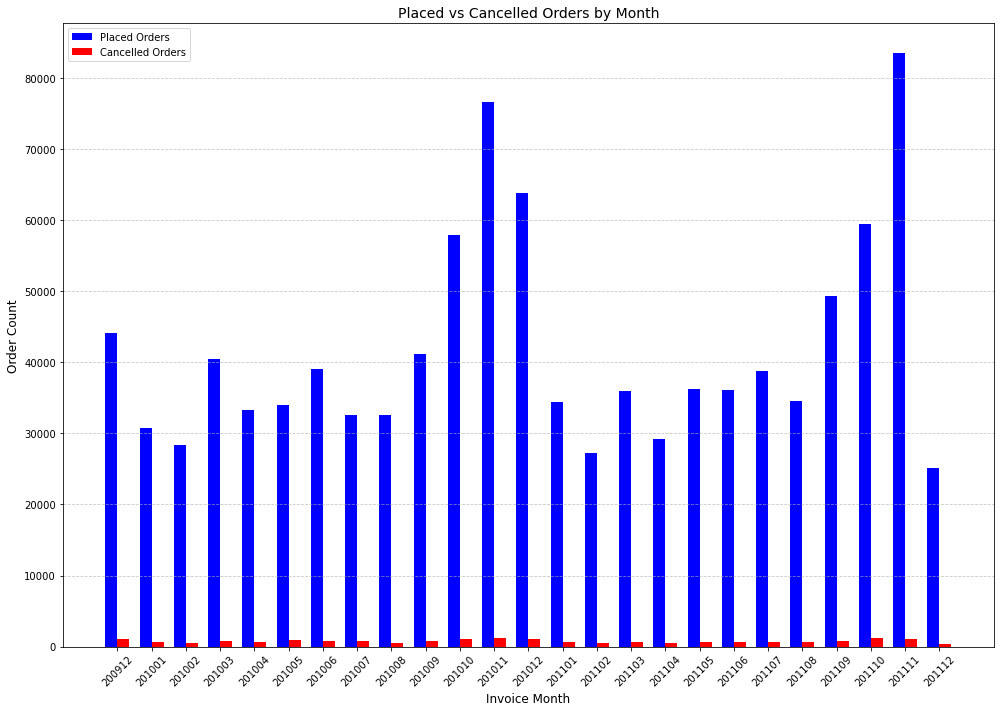

In [262]:
# Plot the data
plt.figure(figsize=(14, 10))

x = merged_df["invoice_month"]
bar_width = 0.35  # Width of the bars
indices = range(len(x))
print(merged_df.head())

plt.bar(indices, merged_df["count"], width=bar_width, label="Placed Orders", color="blue")
plt.bar([i + bar_width for i in indices], merged_df["cancelled_count"], width=bar_width, label="Cancelled Orders", color="red")

plt.xlabel("Invoice Month", fontsize=12)
plt.ylabel("Order Count", fontsize=12)
plt.title("Placed vs Cancelled Orders by Month", fontsize=14)
plt.xticks([i + bar_width / 2 for i in indices], x, fontsize=10 , rotation=45 )  # Set x-tick labels at center
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

   Invoice Month  Total Sales Amount
0         200912          825685.760
1         201001          652708.502
2         201002          553713.306
3         201003          833570.131
4         201004          681528.992
5         201005          659858.860
6         201006          752270.150
7         201007          650712.940
8         201008          697274.910
9         201009          924333.011
10        201010         1165483.910
11        201011         1470272.482
12        201012         1262598.730
13        201101          691364.560
14        201102          523631.890
15        201103          717639.360
16        201104          537808.621
17        201105          770536.020
18        201106          761739.900
19        201107          719221.191
20        201108          759138.420
21        201109         1058590.172
22        201110         1154979.300
23        201111         1509496.330
24        201112          638810.680


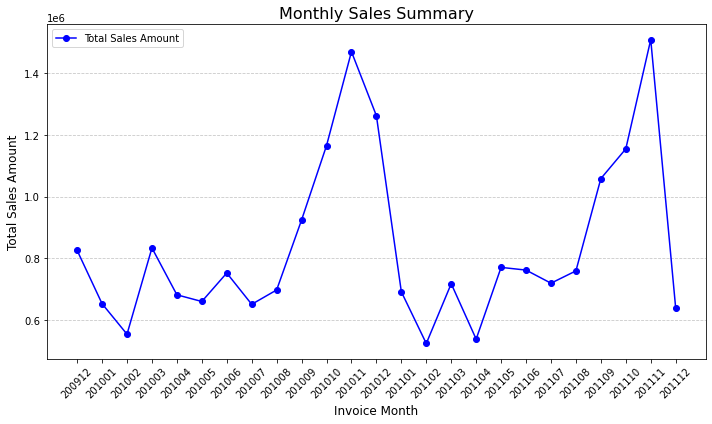

In [264]:
# Monthly Sales

monthly_sales_df = pd.DataFrame(filtered_retail_df)
monthly_sales_df['Total_Amount']=monthly_sales_df['quantity']* monthly_sales_df['unit_price']
monthly_sales_df["invoice_month"] = monthly_sales_df["invoice_date"].dt.to_period("M").astype(str).str.replace("-", "")

monthly_sales_summary = monthly_sales_df.groupby("invoice_month")["Total_Amount"].sum().reset_index()
monthly_sales_summary.columns = ["Invoice Month", "Total Sales Amount"]

print(monthly_sales_summary)

plt.figure(figsize=(10, 6))

plt.plot(
    monthly_sales_summary["Invoice Month"],
    monthly_sales_summary["Total Sales Amount"],
    marker="o",  # Add markers for each data point
    color="blue",
    label="Total Sales Amount"
)

plt.title("Monthly Sales Summary", fontsize=16)
plt.xlabel("Invoice Month", fontsize=12)
plt.ylabel("Total Sales Amount", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10, rotation=45)  # Rotate x-axis labels for better visibility
plt.legend()


plt.tight_layout()
plt.show()

#print(monthly_sales_df.head())


  Invoice Month  Total Sales Amount  Growth Percentage
0        200912          825685.760                NaN
1        201001          652708.502         -20.949527
2        201002          553713.306         -15.166831
3        201003          833570.131          50.541828
4        201004          681528.992         -18.239754


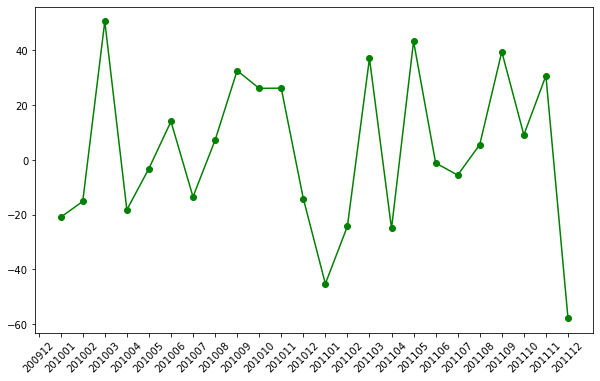

In [265]:
# Monthly Sales Growth
monthly_sales_summary["Growth Percentage"] = (
    monthly_sales_summary["Total Sales Amount"].pct_change() * 100
)
print(monthly_sales_summary.head())

plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)
plt.plot(
    monthly_sales_summary["Invoice Month"],
    monthly_sales_summary["Growth Percentage"],
    marker="o", 
    color="green",
    label="Growth Percentage"
)

  invoice_no stock_code                          description  quantity        invoice_date  unit_price  customer_id         country  Invoice_amount  Total_Amount invoice_month
0     489434      85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12 2009-12-01 07:45:00        6.95      13085.0  United Kingdom            83.4          83.4        200912
1     489434     79323P                   PINK CHERRY LIGHTS        12 2009-12-01 07:45:00        6.75      13085.0  United Kingdom            81.0          81.0        200912
2     489434     79323W                  WHITE CHERRY LIGHTS        12 2009-12-01 07:45:00        6.75      13085.0  United Kingdom            81.0          81.0        200912
3     489434      22041         RECORD FRAME 7" SINGLE SIZE         48 2009-12-01 07:45:00        2.10      13085.0  United Kingdom           100.8         100.8        200912
4     489434      21232       STRAWBERRY CERAMIC TRINKET BOX        24 2009-12-01 07:45:00        1.25      13085.0  Uni

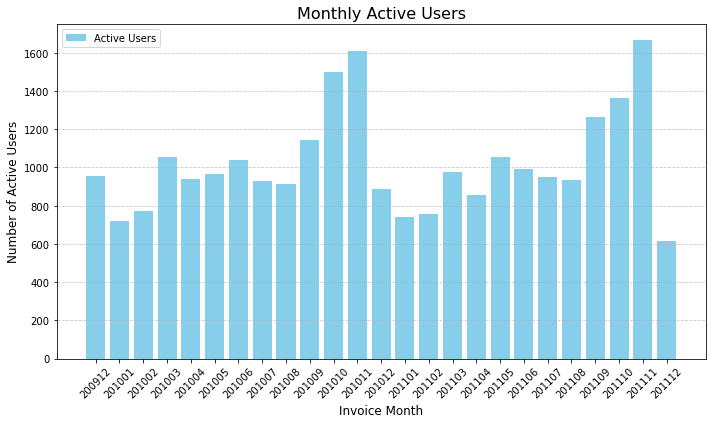

In [266]:
# Monthly Active Users
monthly_sales_df = pd.DataFrame(filtered_retail_df)
print(monthly_sales_df.head())

monthly_sales_df["invoice_month"] = (
    monthly_sales_df["invoice_date"].dt.to_period("M").astype(str).str.replace("-", "")
)

monthly_active_users = (
    monthly_sales_df.groupby("invoice_month")["customer_id"].nunique().reset_index()
)
monthly_active_users.columns = ["Invoice Month", "Active Users"]
print(monthly_active_users)

plt.figure(figsize=(10, 6))
plt.bar(
    monthly_active_users["Invoice Month"],
    monthly_active_users["Active Users"],
    color="skyblue",
    label="Active Users"
)

plt.title("Monthly Active Users", fontsize=16)
plt.xlabel("Invoice Month", fontsize=12)
plt.ylabel("Number of Active Users", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(fontsize=10, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()







In [267]:

# New and Existing users
filtered_retail_df["invoice_date"] = pd.to_datetime(filtered_retail_df["invoice_date"])


filtered_retail_df["invoice_month"] = (
    filtered_retail_df["invoice_date"].dt.to_period("M").astype(str).str.replace("-", "")
)


first_purchase = (
    filtered_retail_df.groupby("customer_id")["invoice_month"].min().reset_index()
)
first_purchase.columns = ["customer_id", "invoice_month"]

purchase_count = first_purchase.groupby('invoice_month')['customer_id'].nunique().reset_index()
purchase_count.columns = ['invoice_month', 'First_customer_count']

total_purchase = (
    filtered_retail_df.groupby("invoice_month").size().reset_index(name="total_count")
)


merged_user_df = pd.merge(total_purchase, purchase_count, on="invoice_month", how="outer")

merged_user_df['existing_users'] = merged_user_df['total_count']-merged_user_df['First_customer_count']

print(merged_user_df.head())


  invoice_month  total_count  First_customer_count  existing_users
0        200912        44123                   955           43168
1        201001        30741                   383           30358
2        201002        28365                   376           27989
3        201003        40477                   443           40034
4        201004        33355                   294           33061


  invoice_month  count  cancelled_count
0        200912  44123             1015
1        201001  30741              686
2        201002  28365              576
3        201003  40477              844
4        201004  33355              626


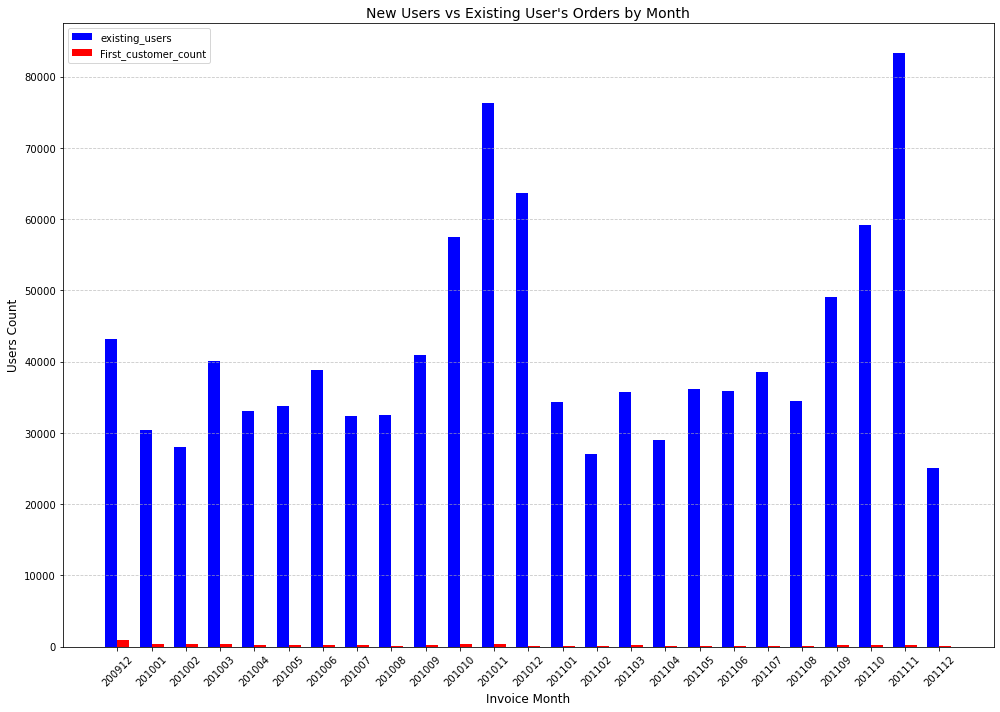

In [268]:
# New and Existing users plot
plt.figure(figsize=(14, 10))

x = merged_user_df["invoice_month"]
bar_width = 0.35  # Width of the bars
indices = range(len(x))
print(merged_df.head())

plt.bar(indices, merged_user_df["existing_users"], width=bar_width, label="existing_users", color="blue")
plt.bar([i + bar_width for i in indices], merged_user_df["First_customer_count"], width=bar_width, label="First_customer_count", color="red")

plt.xlabel("Invoice Month", fontsize=12)
plt.ylabel("Users Count", fontsize=12)
plt.title("New Users vs Existing User's Orders by Month", fontsize=14)
plt.xticks([i + bar_width / 2 for i in indices], x, fontsize=10 , rotation = 45)  # Set x-tick labels at center
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

      customer_id  Frequency
0         12346.0         34
1         12347.0        253
2         12348.0         51
3         12349.0        175
4         12350.0         17
...           ...        ...
5876      18283.0        986
5877      18284.0         28
5878      18285.0         12
5879      18286.0         67
5880      18287.0        155

[5881 rows x 2 columns]


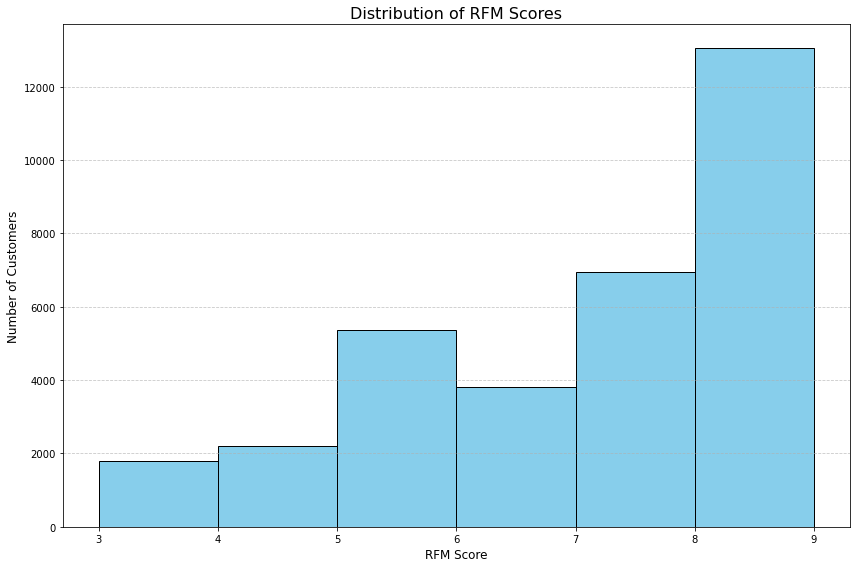

   customer_id  Recency  Frequency  Monetary  RFM_Score
0      12346.0      725         34  77556.46          7
1      12346.0      721         34  77556.46          7
2      12346.0      704         34  77556.46          7
3      12346.0      693         34  77556.46          7
4      12346.0      685         34  77556.46          7


In [269]:
# Finding RFM
import pandas as pd
import matplotlib.pyplot as plt

filtered_retail_df['invoice_date'] = pd.to_datetime(filtered_retail_df['invoice_date'])

current_date = filtered_retail_df['invoice_date'].max()
filtered_retail_df['Recency'] = (current_date - filtered_retail_df['invoice_date']).dt.days
#print(current_date)
#print(filtered_retail_df[['invoice_date', 'Recency']])

frequency_df = filtered_retail_df.groupby('customer_id').size().reset_index(name='Frequency')
print(frequency_df)

filtered_retail_df['Total_Spend'] = filtered_retail_df['quantity'] * filtered_retail_df['unit_price']
monetary_df = filtered_retail_df.groupby('customer_id')['Total_Spend'].sum().reset_index(name='Monetary')


rfm_df = frequency_df.merge(monetary_df, on='customer_id').merge(
    filtered_retail_df[['customer_id', 'Recency']].drop_duplicates(), on='customer_id'
)

quantiles = rfm_df.quantile(q=[0.25, 0.5, 0.75])


def rfm_score(row):
    recency_score = 1 if row['Recency'] <= quantiles.loc[0.25, 'Recency'] else (
        2 if row['Recency'] <= quantiles.loc[0.5, 'Recency'] else 3
    )
    frequency_score = 1 if row['Frequency'] <= quantiles.loc[0.25, 'Frequency'] else (
        2 if row['Frequency'] <= quantiles.loc[0.5, 'Frequency'] else 3
    )
    monetary_score = 1 if row['Monetary'] <= quantiles.loc[0.25, 'Monetary'] else (
        2 if row['Monetary'] <= quantiles.loc[0.5, 'Monetary'] else 3
    )
    return pd.Series([recency_score, frequency_score, monetary_score], index=['Recency_Score', 'Frequency_Score', 'Monetary_Score'])

rfm_df[['Recency_Score', 'Frequency_Score', 'Monetary_Score']] = rfm_df.apply(rfm_score, axis=1)


rfm_df['RFM_Score'] = rfm_df['Recency_Score'] + rfm_df['Frequency_Score'] + rfm_df['Monetary_Score']


plt.figure(figsize=(12, 8))
plt.hist(rfm_df['RFM_Score'], bins=range(3, 10), color='skyblue', edgecolor='black')
plt.title('Distribution of RFM Scores', fontsize=16)
plt.xlabel('RFM Score', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


plt.show()


print(rfm_df[['customer_id', 'Recency', 'Frequency', 'Monetary', 'RFM_Score']].head())


In [270]:

rfm_df['RecencyScore'] = pd.qcut(rfm_df['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm_df['FrequencyScore'] = pd.qcut(rfm_df['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm_df['MonetaryScore'] = pd.qcut(rfm_df['Monetary'], 5, labels=[1, 2, 3, 4, 5])


rfm_df["RFM_Score"] = (
    rfm_df['RecencyScore'].astype(str) +
    rfm_df['FrequencyScore'].astype(str) +
    rfm_df['MonetaryScore'].astype(str)
)


seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Lose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}


rfm_df['Segment'] = (
    rfm_df['RecencyScore'].astype(str) + rfm_df['FrequencyScore'].astype(str)
)
rfm_df['Segment'] = rfm_df['Segment'].replace(seg_map, regex=True)

pd.set_option('display.max_columns', 70)
print(rfm_df.head())


   customer_id  Frequency  Monetary  Recency  Recency_Score  Frequency_Score  Monetary_Score RFM_Score RecencyScore FrequencyScore MonetaryScore      Segment
0      12346.0         34  77556.46      725              3                1               3       115            1              1             5  Hibernating
1      12346.0         34  77556.46      721              3                1               3       115            1              1             5  Hibernating
2      12346.0         34  77556.46      704              3                1               3       115            1              1             5  Hibernating
3      12346.0         34  77556.46      693              3                1               3       115            1              1             5  Hibernating
4      12346.0         34  77556.46      685              3                1               3       115            1              1             5  Hibernating
